In [45]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Bank data (1).csv")

In [3]:
df.head()

,Cust No.,First Name,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,1,Walter,Hargrave,619,France,Female,42,2.0,NaN,1.0,Yes,Yes,101349,1
1,2,Daniel,Hill,608,Spain,Female,41,1.0,83807.86,1.0,No,Yes,112543,0
2,3,Melissa,Onio,502,France,Female,42,8.0,159660.80,3.0,Yes,No,113932,1
3,4,Miley,Boni,699,France,Female,39,1.0,NaN,2.0,No,No,93827,0
4,5,James,Mitchell,850,Spain,Female,43,2.0,125510.82,1.0,Yes,Yes,79084,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cust No.         10071 non-null  int64  
 1   First Name       10071 non-null  object 
 2   Surname          10071 non-null  object 
 3   Credit Score     10071 non-null  int64  
 4   Geography        10071 non-null  object 
 5   Gender           10071 non-null  object 
 6   Age              10071 non-null  int64  
 7   Tenure           10071 non-null  float64
 8   Balance          10071 non-null  float64
 9   Num Of Policies  10071 non-null  float64
 10  Credit Card      10071 non-null  object 
 11  Active Member    10071 non-null  object 
 12  Salary           10071 non-null  int64  
 13  Exited           10071 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [7]:
round(df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].describe(),2)

,Credit Score,Age,Tenure,Balance,Num Of Policies,Salary
count,10071.00,10071.00,10053.00,6451.00,9904.00,10071.00
mean,650.37,39.01,5.01,119843.19,1.53,100091.47
std,97.01,10.64,2.89,30726.85,0.59,57514.93
min,350.00,18.00,0.00,1053.00,1.00,12.00
25%,583.00,32.00,3.00,100051.05,1.00,50974.00
50%,652.00,37.00,5.00,119839.69,1.00,100236.00
75%,718.00,44.00,7.00,139642.53,2.00,149400.50
max,850.00,92.00,10.00,250898.09,4.00,199992.00


In [9]:
round(df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].skew(),2)

Credit Score      -0.08
Age                1.06
Tenure             0.01
Balance            0.03
Num Of Policies    0.82
Salary             0.00
dtype: float64

In [10]:
round(df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].kurt(),2)

Credit Score      -0.42
Age                1.58
Tenure            -1.16
Balance            0.40
Num Of Policies    0.81
Salary            -1.18
dtype: float64

In [11]:
df["Geography"].value_counts()

France     5027
Germany    2508
Spain      2464
Name: Geography, dtype: int64

In [15]:
df["Geography"].fillna(value= "France",inplace=True)

In [13]:
df["Gender"].value_counts()

Male      5465
Female    4538
Name: Gender, dtype: int64

In [16]:
df["Gender"].fillna(value= "Male",inplace=True)

In [17]:
df["Tenure"].fillna(value= 5,inplace=True)

In [18]:
df["Balance"].fillna(value= 119843.19,inplace=True)

In [19]:
df["Num Of Policies"].fillna(value= 1.53,inplace=True)

In [22]:
#Label Encoder

le = LabelEncoder()
df["Geography"] = le.fit_transform(df["Geography"])
df["Gender"] = le.fit_transform(df["Gender"])
df["Credit Card"] = le.fit_transform(df["Credit Card"])
df["Active Member"] = le.fit_transform(df["Active Member"])

In [23]:
df.head()

,Cust No.,First Name,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,1,Walter,Hargrave,619,0,0,42,2.0,119843.19,1.0,1,1,101349,1
1,2,Daniel,Hill,608,2,0,41,1.0,83807.86,1.0,0,1,112543,0
2,3,Melissa,Onio,502,0,0,42,8.0,159660.80,3.0,1,0,113932,1
3,4,Miley,Boni,699,0,0,39,1.0,119843.19,2.0,0,0,93827,0
4,5,James,Mitchell,850,2,0,43,2.0,125510.82,1.0,1,1,79084,0


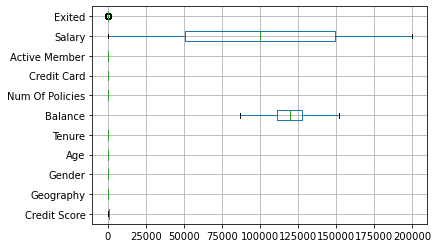

In [28]:
df.boxplot(vert=0);

In [25]:
df.drop(["Cust No.","First Name","Surname"],axis=1,inplace=True)

In [26]:
def Outlier(my_df, col):
    q1 = my_df[col].quantile(0.25)
    q3 = my_df[col].quantile(0.75)
    IQR = q3 - q1
    lw = q1 - 1.5*IQR
    uw = q3 + 1.5*IQR
    my_df[col] = np.where(my_df[col]>uw,uw,my_df[col])
    my_df[col] = np.where(my_df[col]<lw,lw,my_df[col])
    return my_df 

In [27]:
Outlier(df,["Balance","Num Of Policies","Age","Credit Score"])

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,619.0,0,0,42.0,2.0,119843.19,1.00,1,1,101349,1
1,608.0,2,0,41.0,1.0,86979.11,1.00,0,1,112543,0
2,502.0,0,0,42.0,8.0,152258.35,3.00,1,0,113932,1
3,699.0,0,0,39.0,1.0,119843.19,2.00,0,0,93827,0
4,850.0,2,0,43.0,2.0,125510.82,1.00,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
10066,777.0,0,0,35.0,3.0,86979.11,2.00,1,1,156120,0
10067,561.0,1,1,62.0,8.0,152258.35,1.53,0,1,24613,1
10068,450.0,0,1,60.0,9.0,86979.11,3.50,1,1,86961,0
10069,819.0,1,1,45.0,3.0,94661.00,3.00,1,1,89433,1


In [29]:
df["Exited"].value_counts()

0    8009
1    2062
Name: Exited, dtype: int64

In [31]:
X = df.drop("Exited",axis=1)
y = df[["Exited"]]

In [32]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 5)

In [34]:
#Model selection

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_pred = xgb.predict(X_test)

In [37]:
accuracy_score(y_test,xgb_pred)

0.8392059553349875

In [38]:
accuracy_score(y_train,xgb.predict(X_train))

0.9534508440913605

In [40]:
stf = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 5)

In [42]:
np.mean(cross_val_score(xgb,X,y,cv=stf))

C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\celestin jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8482769989724535

In [44]:
np.std(cross_val_score(xgb,X,y,cv=stf))

[22:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.002537546784167108

In [46]:
params = {"learning_rate": [0.01,0.1,0.2,0.5], "gamma": [0.1,0.2,0.5,0.7,0.8,0.9], "reg_lambda": [0.1,0.2,0.3,0.5,0.7,0.8,0.9]}
model = GridSearchCV(xgb, params,cv=stf)

In [47]:
model.fit(X,y)

[22:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1...ng=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                             

In [48]:
model.best_params_

{'gamma': 0.8, 'learning_rate': 0.1, 'reg_lambda': 0.5}

In [49]:
xgb1 = XGBClassifier(gamma= 0.8, learning_rate= 0.1, reg_lambda= 0.5)
xgb1.fit(X_train,y_train)

[23:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.8, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgb1.score(X_train,y_train)

0.9092601787487586

In [51]:
xgb1.score(X_test,y_test)

0.8456575682382134

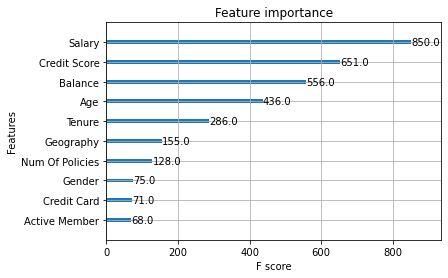

In [53]:
xgboost.plot_importance(xgb);

In [66]:
X1 = df[["Salary","Credit Score","Balance","Age","Tenure","Geography","Num Of Policies"]]
y = df[["Exited"]]

In [67]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.2,random_state=5)

In [68]:
xgb2 = XGBClassifier(gamma= 0.8, learning_rate= 0.1, reg_lambda= 0.5)
xgb2.fit(X1_train,y1_train)

[23:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.8, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
xgb2.score(X1_test,y1_test)

0.8342431761786601